In [1]:
#pip install pyyaml pandas rdflib matplotlib seaborn


In [2]:
import json

# Define file paths
stammdata_map_path = "stammdata_map.json"
stammdata_schema_path = "stammdata_schema.json"

# Load the JSON files
def load_json(file_path):
    with open(file_path, "r", encoding="utf-8") as file:
        return json.load(file)

# Load the data
stammdata_map = load_json(stammdata_map_path)
stammdata_schema = load_json(stammdata_schema_path)

# Display keys to understand the structure
print("Keys in stammdata_map.json:", stammdata_map.keys())
print("\nKeys in stammdata_schema.json:", stammdata_schema.keys())

# Display a sample of the data for a quick overview
print("\nSample from stammdata_map.json:")
print(json.dumps(stammdata_map, indent=2)[:1000])  # Display first 1000 chars for readability

print("\nSample from stammdata_schema.json:")
print(json.dumps(stammdata_schema, indent=2)[:1000])  # Display first 1000 chars for readability


Keys in stammdata_map.json: dict_keys(['Behaeltertyp', 'Breite', 'Code', 'Count_of_EW_0WM_WT', 'EWP_Confirmed_Time', 'EWP_Quittierzeit_Lageraufgabe', 'Gewichtseinheit', 'HU_Nummer', 'Hoehe', 'Laenge', 'Masseinheit', 'Materialnummer', 'Materialtext', 'Menge', 'Mengeneinheit', 'Nettogewicht', 'Timestamp', 'Timestamp_formatiert', 'Volumen', 'Volumeneinheit', 'uuid'])

Keys in stammdata_schema.json: dict_keys(['$schema', 'type', 'properties', 'required'])

Sample from stammdata_map.json:
{
  "Behaeltertyp": "binType",
  "Breite": "objectWidth",
  "Code": "code",
  "Count_of_EW_0WM_WT": "ewCount",
  "EWP_Confirmed_Time": "ewConfirmedTime",
  "EWP_Quittierzeit_Lageraufgabe": "ewStoreReceiptTime",
  "Gewichtseinheit": "massUnit",
  "HU_Nummer": "huNumber",
  "Hoehe": "objectHeight",
  "Laenge": "objectLength",
  "Masseinheit": "lengthUnit",
  "Materialnummer": "materialNumber",
  "Materialtext": "materialDescription",
  "Menge": "amount",
  "Mengeneinheit": "amountUnit",
  "Nettogewicht": "ob

In [3]:
from rdflib import Graph, URIRef
import networkx as nx
import matplotlib.pyplot as plt

# Specify your TTL files
ttl_files = {
    "sample": "sickbins-sample.ttl",  # Use this first for quick tests
    "full": "sickbins.ttl",            # Main dataset
    "taxonomy": "sickbins-taxonomy.ttl", # Taxonomy relationships
    "alignment": "alignment.ttl"
}

# Function to load a TTL file
def load_graph(ttl_path):
    g = Graph()
    g.parse(ttl_path, format="turtle")
    print(f" Loaded {ttl_path}: {len(g)} triples found.")
    return g



In [4]:

# Load sample dataset first
graph_sample = load_graph(ttl_files["sample"])
# Load the taxonomy TTL file using your function
g_taxonomy = load_graph(ttl_files["taxonomy"])
# Load the alignment TTL file
g_alignment = load_graph(ttl_files["alignment"])



 Loaded sickbins-sample.ttl: 440 triples found.
 Loaded sickbins-taxonomy.ttl: 176 triples found.
 Loaded alignment.ttl: 103 triples found.


In [5]:

# Extract unique subjects, predicates, and objects
subjects = set(graph_sample.subjects())
predicates = set(graph_sample.predicates())
objects = set(graph_sample.objects())


In [6]:

print(f" Unique Nodes (Subjects & Objects): {len(subjects | objects)}")
print(f" Unique Relationships (Predicates): {len(predicates)}\n")

# Display sample triples (first 10)
print(" Sample Triples from the KG:")
for s, p, o in list(graph_sample)[:10]:
    print(f"{s} --[{p}]--> {o}")

 Unique Nodes (Subjects & Objects): 203
 Unique Relationships (Predicates): 35

 Sample Triples from the KG:
https://data.sick.com/res/sickbins/ea351bea-52e2-4dd4-b6fc-206abccd762e --[https://data.sick.com/voc/sam/core/artifact-model/accessURL]--> https://data.sick.com/res/sickbins/d413b53a-e43a-49c2-9d11-4bbb5454af11.Sensor1.dat.zip__intensity.pcd
https://data.sick.com/res/sickbins/db8569da-b140-490a-9e8b-7dc439bacab0 --[http://www.w3.org/1999/02/22-rdf-syntax-ns#type]--> https://data.sick.com/voc/trackandtrace/TargetObject
https://data.sick.com/res/sickbins/70e5ce88-2348-491c-b17d-7ae53d9918e7 --[http://www.w3.org/1999/02/22-rdf-syntax-ns#type]--> http://www.w3.org/2002/07/owl#NamedIndividual
https://data.sick.com/res/sickbins/9221fab8-05a6-44ef-800b-22c97394afe0 --[https://data.sick.com/voc/sam/core/artifact-model/hasArtifact]--> https://data.sick.com/res/sickbins/692931a3-35df-4604-b707-cb63cff807fa
https://data.sick.com/res/sickbins/2af7b7b9-3065-4e35-9a13-e70f776fde38 --[http://w

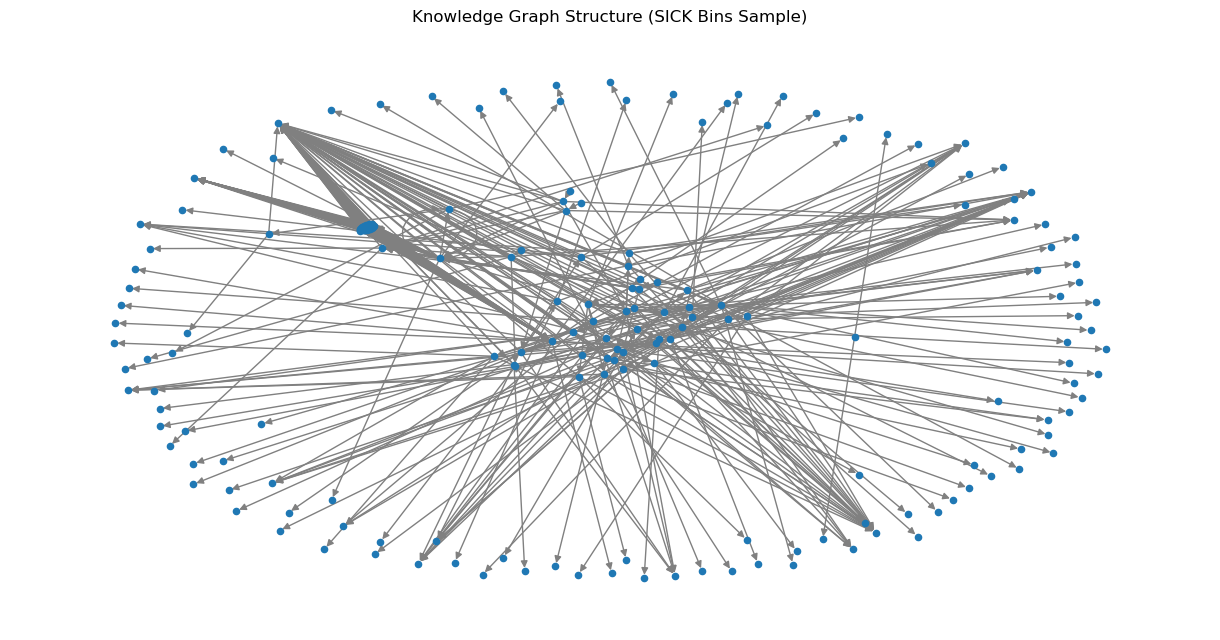

In [7]:


# Convert RDF graph to NetworkX graph
nx_graph = nx.DiGraph()

for s, p, o in graph_sample:
    nx_graph.add_edge(str(s), str(o), label=str(p))

# Graph visualization
plt.figure(figsize=(12, 6))
pos = nx.spring_layout(nx_graph, seed=42)
nx.draw(nx_graph, pos, with_labels=False, node_size=20, edge_color="gray")
plt.title("Knowledge Graph Structure (SICK Bins Sample)")
plt.show()


In [8]:

# Compute graph statistics
print("\n Graph Statistics:")
print(f" Number of Nodes: {nx_graph.number_of_nodes()}")
print(f" Number of Edges: {nx_graph.number_of_edges()}")
print(f" Average Node Degree: {sum(dict(nx_graph.degree()).values()) / nx_graph.number_of_nodes():.2f}")

# ---- TAXONOMY ANALYSIS ----
print("\n Analyzing Taxonomy (Hierarchies & Classes)")



 Graph Statistics:
 Number of Nodes: 203
 Number of Edges: 440
 Average Node Degree: 4.33

 Analyzing Taxonomy (Hierarchies & Classes)


In [9]:

# Extract all unique predicates
unique_predicates = set(g_taxonomy.predicates())

print("\n Unique Relationships (Predicates) in the Taxonomy File:")
for pred in unique_predicates:
    print(pred)

# Try to find hierarchical relationships dynamically
hierarchy_relationships = []

for pred in unique_predicates:
    for s, _, o in g_taxonomy.triples((None, URIRef(pred), None)):
        hierarchy_relationships.append((s, pred, o))





 Unique Relationships (Predicates) in the Taxonomy File:
http://www.w3.org/2000/01/rdf-schema#label
http://purl.org/dc/terms/modified
http://www.w3.org/2002/07/owl#versionInfo
http://purl.org/dc/terms/issued
http://purl.org/dc/terms/rights
http://www.w3.org/2004/02/skos/core#inScheme
https://data.sick.com/voc/ccr/life-cycle-model/hasState
http://purl.org/vocab/vann/preferredNamespacePrefix
http://www.w3.org/2004/02/skos/core#broarder
http://www.w3.org/2004/02/skos/core#definition
http://www.w3.org/1999/02/22-rdf-syntax-ns#type
http://purl.org/dc/terms/description
http://www.w3.org/2004/02/skos/core#topConceptOf
http://www.w3.org/2002/07/owl#versionIRI
http://purl.org/vocab/vann/preferredNamespaceUri
http://www.w3.org/2000/01/rdf-schema#isDefinedBy
http://www.w3.org/2004/02/skos/core#hasTopConcept
http://www.w3.org/2004/02/skos/core#prefLabel
http://www.w3.org/2004/02/skos/core#changeNote
http://purl.org/dc/terms/creator


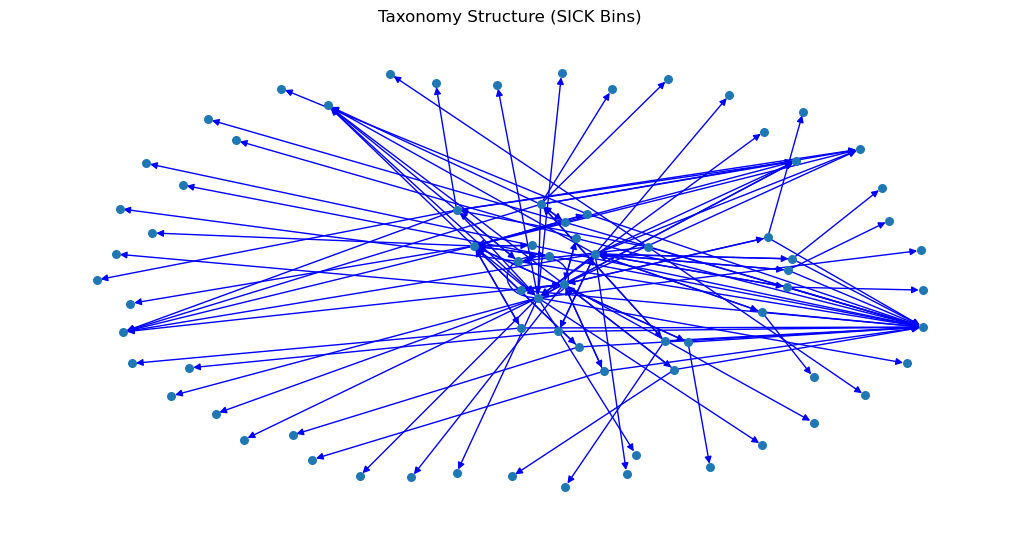

In [10]:

# Convert the hierarchy relationships into a NetworkX graph
taxonomy_graph = nx.DiGraph()
for s, _, o in hierarchy_relationships:
    taxonomy_graph.add_edge(str(s), str(o))

# Visualize the taxonomy hierarchy
plt.figure(figsize=(10, 5))
pos = nx.spring_layout(taxonomy_graph, seed=42)
nx.draw(taxonomy_graph, pos, with_labels=False, node_size=30, edge_color="blue")
plt.title("Taxonomy Structure (SICK Bins)")
plt.show()


 Found 1 hierarchical relationships. Sample:
https://data.sick.com/voc/sickbins-taxonomy/1234567 --[http://www.w3.org/2004/02/skos/core#broarder]--> https://data.sick.com/voc/sickbins-taxonomy/Material


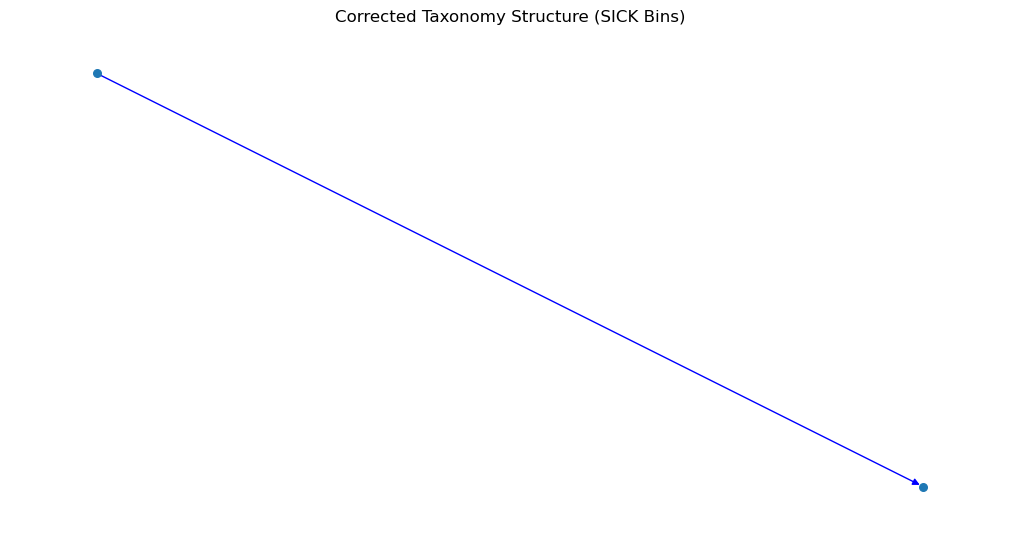

In [11]:
from rdflib import Graph, URIRef
import networkx as nx
import matplotlib.pyplot as plt

# Check for possible hierarchy predicates
correct_pred = URIRef("http://www.w3.org/2004/02/skos/core#broader")
typo_pred = URIRef("http://www.w3.org/2004/02/skos/core#broarder")  # Typo detected

# Extract `skos:broader` relationships
hierarchy_relationships = []

for pred in [correct_pred, typo_pred]:  # Check both correct and typo versions
    for s, _, o in g_taxonomy.triples((None, pred, None)):
        hierarchy_relationships.append((s, pred, o))

# Print results
print(f"\n Found {len(hierarchy_relationships)} hierarchical relationships. Sample:")
for s, p, o in hierarchy_relationships[:10]:
    print(f"{s} --[{p}]--> {o}")

# Convert hierarchy to NetworkX graph
taxonomy_graph = nx.DiGraph()
for s, _, o in hierarchy_relationships:
    taxonomy_graph.add_edge(str(s), str(o))

# Visualize the fixed taxonomy hierarchy
plt.figure(figsize=(10, 5))
pos = nx.spring_layout(taxonomy_graph, seed=42)
nx.draw(taxonomy_graph, pos, with_labels=False, node_size=30, edge_color="blue")
plt.title("Corrected Taxonomy Structure (SICK Bins)")
plt.show()



 Found 19 `skos:hasTopConcept` relationships. Sample:
https://data.sick.com/voc/sickbins-taxonomy/BinTypes --[http://www.w3.org/2004/02/skos/core#hasTopConcept]--> https://data.sick.com/voc/sickbins-taxonomy/A1
https://data.sick.com/voc/sickbins-taxonomy/BinTypes --[http://www.w3.org/2004/02/skos/core#hasTopConcept]--> https://data.sick.com/voc/sickbins-taxonomy/A9
https://data.sick.com/voc/sickbins-taxonomy/ObjectTypes --[http://www.w3.org/2004/02/skos/core#hasTopConcept]--> https://data.sick.com/voc/sickbins-taxonomy/invalid
https://data.sick.com/voc/sickbins-taxonomy/ObjectTypes --[http://www.w3.org/2004/02/skos/core#hasTopConcept]--> https://data.sick.com/voc/sickbins-taxonomy/Box
https://data.sick.com/voc/sickbins-taxonomy/ObjectTypes --[http://www.w3.org/2004/02/skos/core#hasTopConcept]--> https://data.sick.com/voc/sickbins-taxonomy/Bag
https://data.sick.com/voc/sickbins-taxonomy/ObjectTypes --[http://www.w3.org/2004/02/skos/core#hasTopConcept]--> https://data.sick.com/voc/sickb

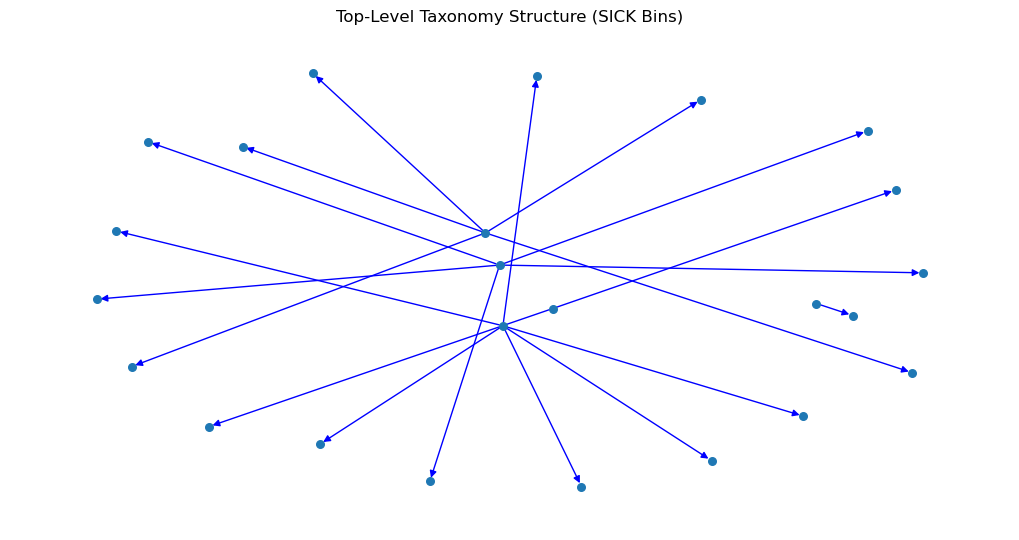

In [12]:
# Define `skos:hasTopConcept` URI
top_concept_pred = URIRef("http://www.w3.org/2004/02/skos/core#hasTopConcept")

# Extract `skos:hasTopConcept` relationships
top_concept_relationships = []

for s, _, o in g_taxonomy.triples((None, top_concept_pred, None)):
    top_concept_relationships.append((s, top_concept_pred, o))

# Print found relationships
print(f"\n Found {len(top_concept_relationships)} `skos:hasTopConcept` relationships. Sample:")
for s, p, o in top_concept_relationships[:10]:
    print(f"{s} --[{p}]--> {o}")

# Convert hierarchy to NetworkX graph
top_concept_graph = nx.DiGraph()
for s, _, o in top_concept_relationships:
    top_concept_graph.add_edge(str(s), str(o))

# Visualize the corrected taxonomy structure
plt.figure(figsize=(10, 5))
pos = nx.spring_layout(top_concept_graph, seed=42)
nx.draw(top_concept_graph, pos, with_labels=False, node_size=30, edge_color="blue")
plt.title("Top-Level Taxonomy Structure (SICK Bins)")
plt.show()



 Found 2 ontology alignments. Sample:
http://www.w3.org/ns/sosa/Observation --[http://www.w3.org/2002/07/owl#equivalentClass]--> https://data.sick.com/voc/sickbins/Observation
https://data.sick.com/voc/sickbins/AppearanceModel --[http://www.w3.org/2002/07/owl#equivalentClass]--> n7d40e38a42e440889cb0d8a71d16b78db1


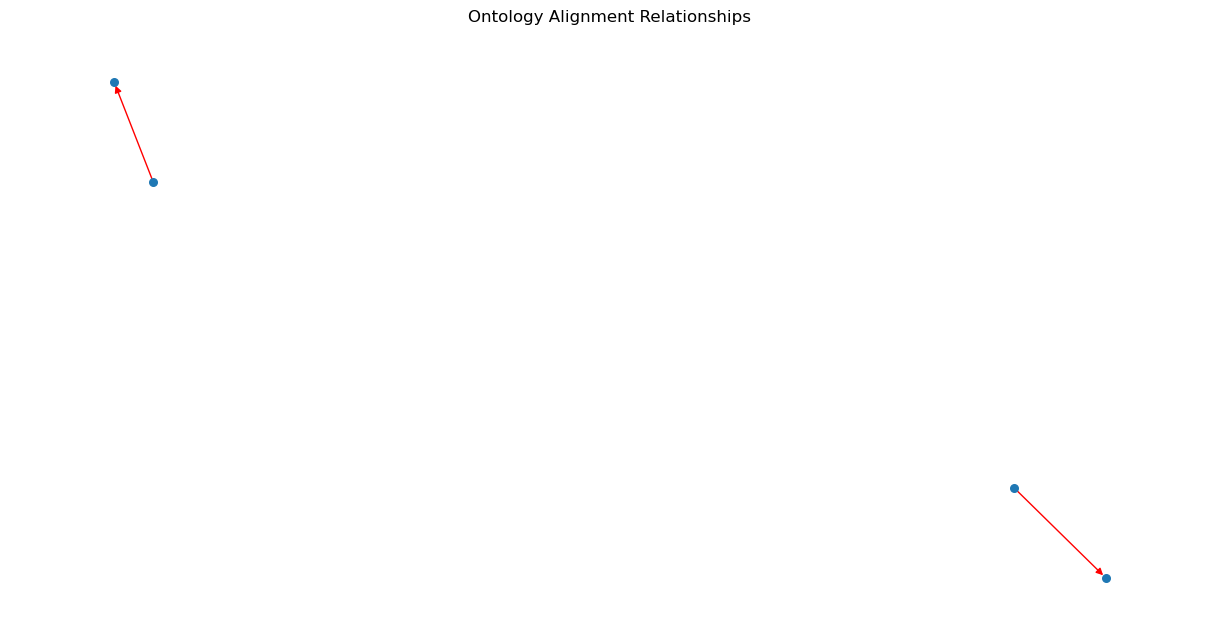

In [13]:

# Define common ontology alignment predicates
alignment_predicates = {
    "sameAs": URIRef("http://www.w3.org/2002/07/owl#sameAs"),
    "exactMatch": URIRef("http://www.w3.org/2004/02/skos/core#exactMatch"),
    "closeMatch": URIRef("http://www.w3.org/2004/02/skos/core#closeMatch"),
    "equivalentClass": URIRef("http://www.w3.org/2002/07/owl#equivalentClass"),
}

# Extract alignments
alignment_triples = []
for label, pred in alignment_predicates.items():
    for s, _, o in g_alignment.triples((None, pred, None)):
        alignment_triples.append((s, pred, o))

# Print extracted alignments
print(f"\n Found {len(alignment_triples)} ontology alignments. Sample:")
for s, p, o in alignment_triples[:10]:
    print(f"{s} --[{p}]--> {o}")

# Convert alignments to a NetworkX graph
import networkx as nx
import matplotlib.pyplot as plt

nx_graph = nx.DiGraph()
for s, p, o in alignment_triples:
    nx_graph.add_edge(str(s), str(o), label=str(p))

# Visualize ontology alignments
plt.figure(figsize=(12, 6))
pos = nx.spring_layout(nx_graph, seed=42)
nx.draw(nx_graph, pos, with_labels=False, node_size=30, edge_color="red")
plt.title("Ontology Alignment Relationships")
plt.show()



 Found 6 `rdfs:subClassOf` relationships. Sample:
https://data.sick.com/voc/sam/application/Product --[http://www.w3.org/2000/01/rdf-schema#subClassOf]--> https://data.sick.com/voc/sam/core-model/Component
http://www.w3.org/ns/sosa/Sensor --[http://www.w3.org/2000/01/rdf-schema#subClassOf]--> https://data.sick.com/voc/sam/core-model/Component
https://data.sick.com/voc/sickbins/AppearanceModel --[http://www.w3.org/2000/01/rdf-schema#subClassOf]--> https://data.sick.com/voc/sam/model/Model
https://data.sick.com/voc/sickbins/ModelledAppearance --[http://www.w3.org/2000/01/rdf-schema#subClassOf]--> https://data.sick.com/voc/sam/model/ModelService
https://data.sick.com/voc/sickbins/Observation --[http://www.w3.org/2000/01/rdf-schema#subClassOf]--> https://data.sick.com/voc/sam/model/ModellingService
https://data.sick.com/voc/sickbins/PhysicalAppearance --[http://www.w3.org/2000/01/rdf-schema#subClassOf]--> https://data.sick.com/voc/sam/core-model/Service


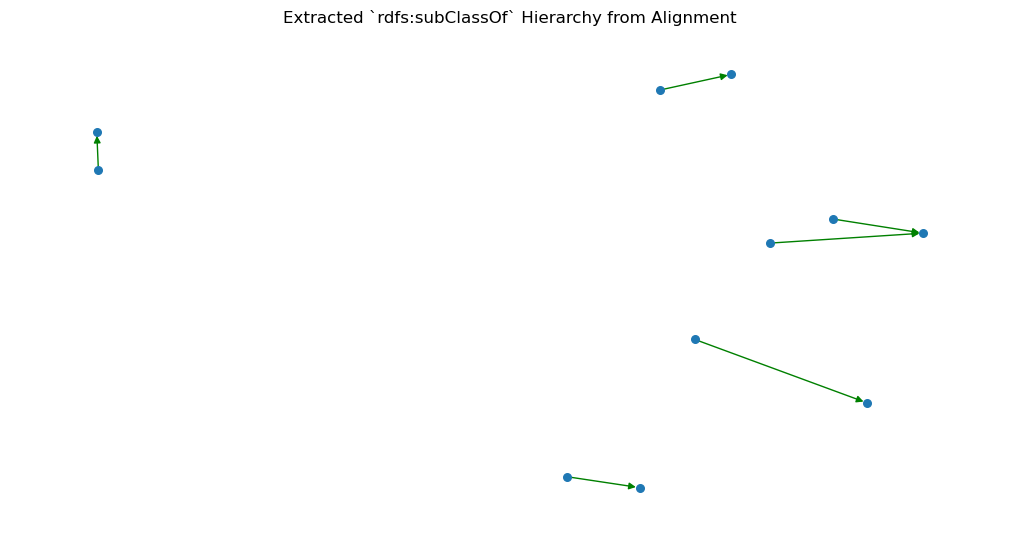

In [14]:
# Define `rdfs:subClassOf` URI
subclass_pred = URIRef("http://www.w3.org/2000/01/rdf-schema#subClassOf")

# Extract `rdfs:subClassOf` relationships
subclass_relationships = []

for s, _, o in g_alignment.triples((None, subclass_pred, None)):
    subclass_relationships.append((s, subclass_pred, o))

# Print found relationships
print(f"\n Found {len(subclass_relationships)} `rdfs:subClassOf` relationships. Sample:")
for s, p, o in subclass_relationships[:10]:
    print(f"{s} --[{p}]--> {o}")

# Convert hierarchy to NetworkX graph
subclass_graph = nx.DiGraph()
for s, _, o in subclass_relationships:
    subclass_graph.add_edge(str(s), str(o))

# Visualize the hierarchy
plt.figure(figsize=(10, 5))
pos = nx.spring_layout(subclass_graph, seed=42)
nx.draw(subclass_graph, pos, with_labels=False, node_size=30, edge_color="green")
plt.title("Extracted `rdfs:subClassOf` Hierarchy from Alignment")
plt.show()


 Loaded sickbins.ttl: 198 triples found.

 Comparing `sickbins.ttl` (full) with `sickbins-sample.ttl`:
 `sickbins.ttl` contains 198 triples.
 `sickbins-sample.ttl` contains 440 triples.

 Unique Relationships (Predicates) in Full Dataset:
http://www.w3.org/2000/01/rdf-schema#label
http://purl.org/dc/terms/modified
http://www.w3.org/2002/07/owl#versionInfo
http://purl.org/dc/terms/issued
http://purl.org/dc/terms/rights
http://www.w3.org/2000/01/rdf-schema#comment
http://purl.org/vocab/vann/preferredNamespacePrefix
http://www.w3.org/2004/02/skos/core#definition
http://www.w3.org/1999/02/22-rdf-syntax-ns#type
http://www.w3.org/2004/02/skos/core#editorialNote
http://purl.org/dc/terms/description
http://www.w3.org/2002/07/owl#versionIRI
http://purl.org/vocab/vann/preferredNamespaceUri
http://www.w3.org/2002/07/owl#imports
http://www.w3.org/2000/01/rdf-schema#isDefinedBy
http://www.w3.org/2000/01/rdf-schema#subClassOf
http://www.w3.org/2000/01/rdf-schema#domain
http://www.w3.org/2002/07/owl#

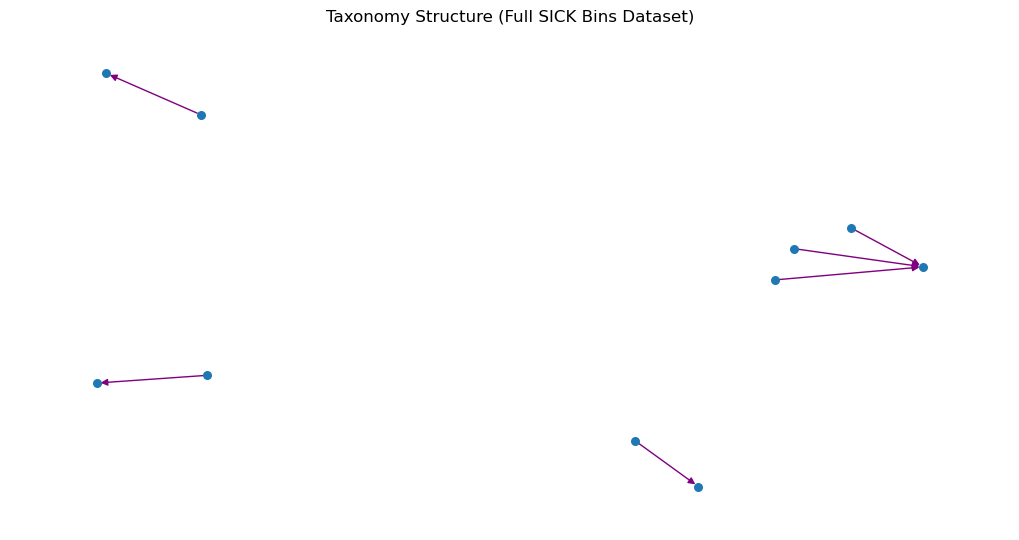

In [15]:
# Load the full dataset
g_full = load_graph(ttl_files["full"])

# Compare with the sample dataset
print(f"\n Comparing `sickbins.ttl` (full) with `sickbins-sample.ttl`:")
print(f" `sickbins.ttl` contains {len(g_full)} triples.")
print(f" `sickbins-sample.ttl` contains {len(graph_sample)} triples.")

# Extract all unique predicates from `sickbins.ttl`
unique_predicates_full = set(g_full.predicates())

print("\n Unique Relationships (Predicates) in Full Dataset:")
for pred in unique_predicates_full:
    print(pred)

# Find hierarchical relationships in the full dataset
hierarchy_relationships_full = []

# Look for subclass and taxonomy relationships
for pred in ["http://www.w3.org/2000/01/rdf-schema#subClassOf",
             "http://www.w3.org/2004/02/skos/core#broader",
             "http://www.w3.org/2004/02/skos/core#hasTopConcept"]:
    pred_uri = URIRef(pred)
    for s, _, o in g_full.triples((None, pred_uri, None)):
        hierarchy_relationships_full.append((s, pred_uri, o))

# Print detected hierarchical relationships
print(f"\n Found {len(hierarchy_relationships_full)} hierarchical relationships. Sample:")
for s, p, o in hierarchy_relationships_full[:10]:
    print(f"{s} --[{p}]--> {o}")

# Convert hierarchy to NetworkX graph
full_taxonomy_graph = nx.DiGraph()
for s, _, o in hierarchy_relationships_full:
    full_taxonomy_graph.add_edge(str(s), str(o))

# Visualize the structure
plt.figure(figsize=(10, 5))
pos = nx.spring_layout(full_taxonomy_graph, seed=42)
nx.draw(full_taxonomy_graph, pos, with_labels=False, node_size=30, edge_color="purple")
plt.title("Taxonomy Structure (Full SICK Bins Dataset)")
plt.show()



 Found 6 `rdfs:subClassOf` relationships. Sample:
https://data.sick.com/voc/sickbins/Image --[http://www.w3.org/2000/01/rdf-schema#subClassOf]--> https://data.sick.com/voc/sam/core-model/Artifact
https://data.sick.com/voc/sickbins/Metadata --[http://www.w3.org/2000/01/rdf-schema#subClassOf]--> https://data.sick.com/voc/sam/core-model/Artifact
https://data.sick.com/voc/sickbins/PointCloud --[http://www.w3.org/2000/01/rdf-schema#subClassOf]--> https://data.sick.com/voc/sam/core-model/Artifact
https://data.sick.com/voc/sickbins/MeasurementSample --[http://www.w3.org/2000/01/rdf-schema#subClassOf]--> n41bc39da584c47d5b8c5701532bf83bfb1
https://data.sick.com/voc/sickbins/Reading --[http://www.w3.org/2000/01/rdf-schema#subClassOf]--> http://www.w3.org/ns/sosa/Result
https://data.sick.com/voc/trackandtrace/TargetObject --[http://www.w3.org/2000/01/rdf-schema#subClassOf]--> https://data.sick.com/voc/sam/application/Product

 Found 13 `rdfs:domain` relationships. Sample:
https://data.sick.com/

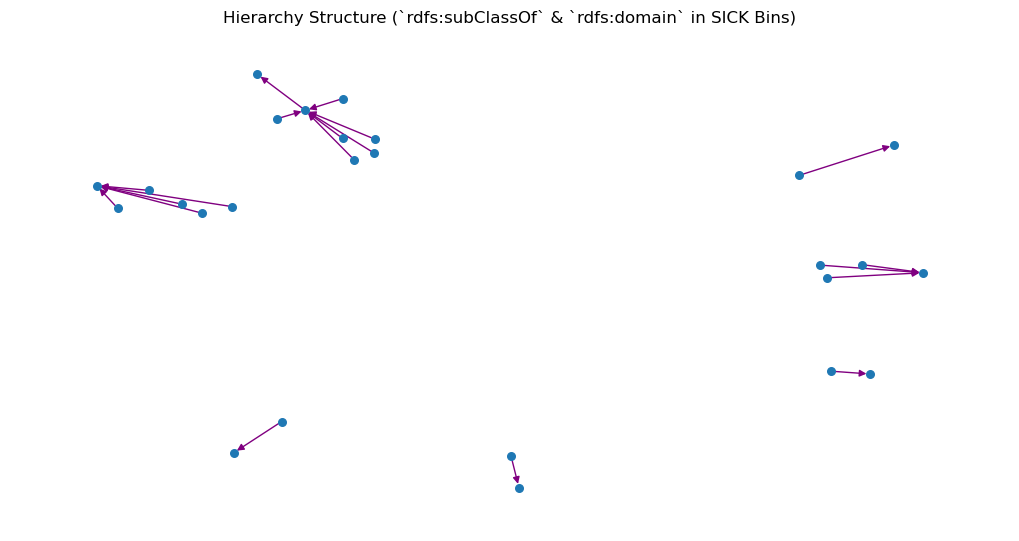

In [16]:
# Define `rdfs:subClassOf` and `rdfs:domain`
subclass_pred = URIRef("http://www.w3.org/2000/01/rdf-schema#subClassOf")
domain_pred = URIRef("http://www.w3.org/2000/01/rdf-schema#domain")

# Extract `rdfs:subClassOf` relationships
subclass_relationships = []
for s, _, o in g_full.triples((None, subclass_pred, None)):
    subclass_relationships.append((s, subclass_pred, o))

# Extract `rdfs:domain` relationships
domain_relationships = []
for s, _, o in g_full.triples((None, domain_pred, None)):
    domain_relationships.append((s, domain_pred, o))

# Print found relationships
print(f"\n Found {len(subclass_relationships)} `rdfs:subClassOf` relationships. Sample:")
for s, p, o in subclass_relationships[:10]:
    print(f"{s} --[{p}]--> {o}")

print(f"\n Found {len(domain_relationships)} `rdfs:domain` relationships. Sample:")
for s, p, o in domain_relationships[:10]:
    print(f"{s} --[{p}]--> {o}")

# Convert hierarchy to NetworkX graph
full_hierarchy_graph = nx.DiGraph()
for s, _, o in subclass_relationships:
    full_hierarchy_graph.add_edge(str(s), str(o))
for s, _, o in domain_relationships:
    full_hierarchy_graph.add_edge(str(s), str(o))

# Visualize the structure
plt.figure(figsize=(10, 5))
pos = nx.spring_layout(full_hierarchy_graph, seed=42)
nx.draw(full_hierarchy_graph, pos, with_labels=False, node_size=30, edge_color="purple")
plt.title("Hierarchy Structure (`rdfs:subClassOf` & `rdfs:domain` in SICK Bins)")
plt.show()


In [17]:
import networkx as nx
from node2vec import Node2Vec
from rdflib import Graph, URIRef


# Convert RDF graph to NetworkX graph
nx_graph = nx.DiGraph()

for s, p, o in graph_sample:
    nx_graph.add_edge(str(s), str(o), label=str(p))

print(f" Converted RDF graph to NetworkX: {nx_graph.number_of_nodes()} nodes, {nx_graph.number_of_edges()} edges.")

# Run node2vec
node2vec = Node2Vec(nx_graph, dimensions=64, walk_length=30, num_walks=200, workers=4)
model = node2vec.fit(window=10, min_count=1, batch_words=4)

# Save embeddings
embedding_file = "node2vec_embeddings.kv"
model.wv.save_word2vec_format(embedding_file)

print(f"✅ Node embeddings saved: {embedding_file}")


 Converted RDF graph to NetworkX: 203 nodes, 440 edges.


Computing transition probabilities:   0%|          | 0/203 [00:00<?, ?it/s]

✅ Node embeddings saved: node2vec_embeddings.kv



 Numerical Data Summary:
       Value
count      0
unique     0
top      NaN
freq     NaN
